In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

# Load Dataset

In [108]:
# Load the dataset
df = pd.read_csv('fashion-mnist_test.csv')

In [109]:
# Split the data into features and labels
X = df.drop('label', axis=1).values
y = df['label'].values

In [110]:
class_name = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Basic EDA

In [187]:
# Display the first few rows of the dataset
print("Display the first few rows of the dataset:")
df.head()


Display the first few rows of the dataset:


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
# Check the dimensions of the dataset
print("Check the dimensions of the dataset:")
print(df.shape)

# Check the data types of the columns
print("Check the data types of the columns:")
print(df.info())

Check the dimensions of the dataset:
(10000, 785)
Check the data types of the columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB
None


In [113]:
#Check for missing values
print(df.isnull().sum())

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64


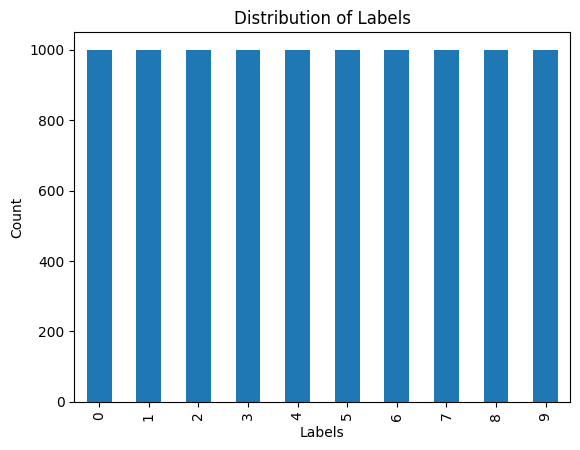

In [114]:
import matplotlib.pyplot as plt

# Plot bar chart of the target variable 'label'
df['label'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.show()


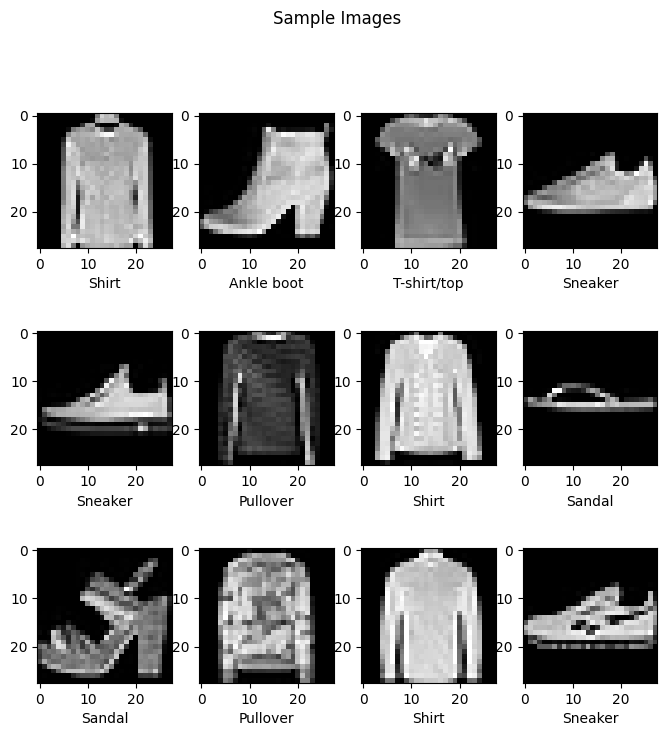

In [115]:
import numpy as np

# Select random samples
random_indexes = np.random.randint(0, df.shape[0], size=12)
samples = df.loc[random_indexes, :]

# Plot the sample images
plt.figure(figsize=(8, 8))
for i in range(len(samples)):
    plt.subplot(3, 4, i + 1)
    plt.imshow(samples.iloc[i, 1:].values.reshape(28, 28), cmap='gray')
    plt.xlabel(class_name[samples.iloc[i, 0]])
plt.suptitle('Sample Images')
plt.show()

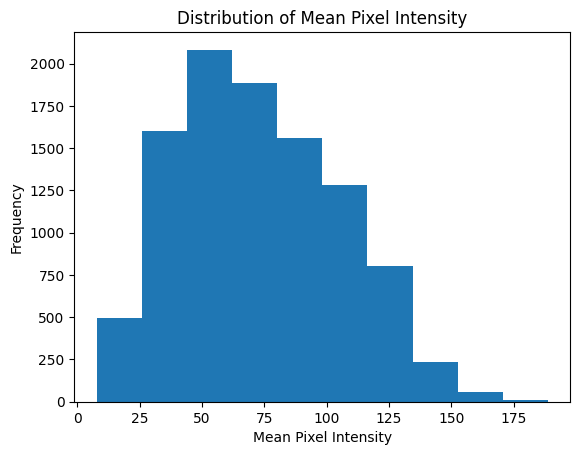

In [116]:
# Calculate the mean pixel intensity for each image
mean = df.iloc[:, 1:].mean(axis=1)
# Plot histogram of the mean pixel intensity
plt.hist(mean)
plt.xlabel('Mean Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Distribution of Mean Pixel Intensity')
plt.show()



# T-SNE

T-SNE (t-Distributed Stochastic Neighbor Embedding) is a dimensionality reduction technique that is widely used for visualizing high-dimensional data in a lower-dimensi

# Visualizing with T-SNE

To visualize data using T-SNE, I use scatter plots. 



In [117]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(X)

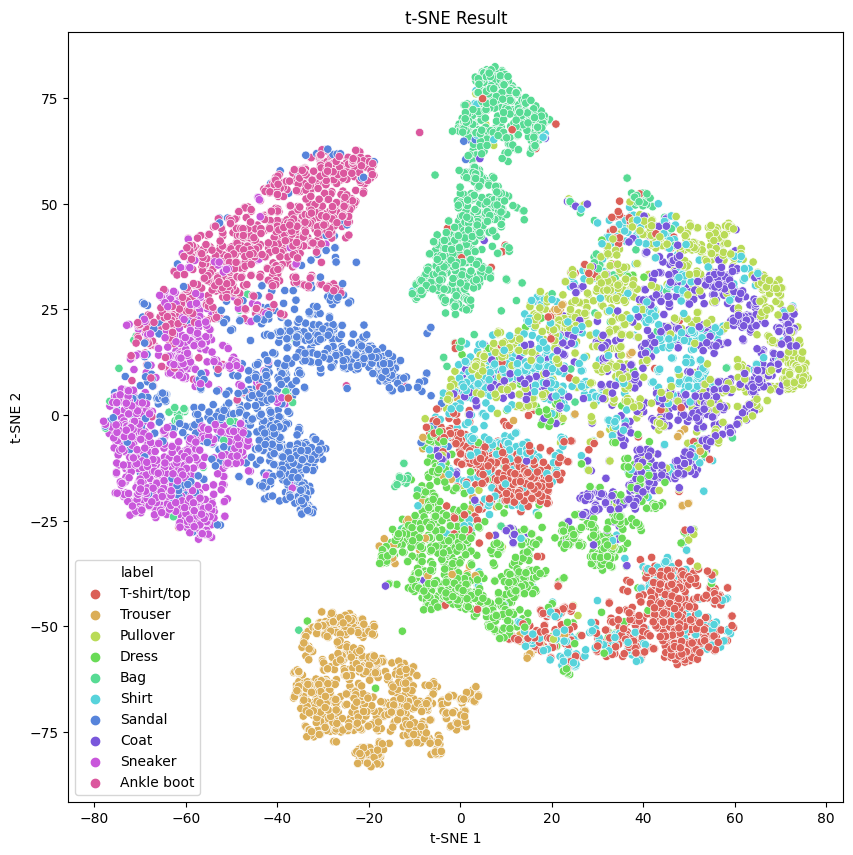

In [118]:
catagory = df['label'].replace({0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat',
                                      5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'})
# Plot t-SNE result
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=catagory, palette=sns.color_palette("hls", 10))
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE Result')
plt.show()

# K means

The code snippet performs a grid search to find the best parameter values for the KMeans clustering algorithm. It loops through different combinations of n_init and max_iter parameters and calculates the inertia (a measure of clustering quality) for each combination. The code keeps track of the combination that yields the lowest inertia value and stores the corresponding parameter values as the best parameters and use those parameters for create kmeans object.

### Tune parameter

In [172]:
from sklearn.cluster import KMeans
parameter_combinations = [(n_init_val, max_iter_val) for n_init_val in range(1, 6) for max_iter_val in range(1, 11)]
best_inertia = float('inf')
best_params = None

for n_init_val, max_iter_val in parameter_combinations:
    kmeans = KMeans(n_clusters=10, n_init=n_init_val, max_iter=max_iter_val)
    kmeans.fit(X)
    inertia = kmeans.inertia_
    
    if inertia < best_inertia:
        best_inertia = inertia
        best_params = (n_init_val, max_iter_val)

print("Best Parameters: n_init =", best_params[0], ", max_iter =", best_params[1])


Best Parameters: n_init = 4 , max_iter = 9


#### Tune parameter using GridSearchCV

In [186]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid
param_grid = {
    'n_init': [2, 5, 10],           # Different values of n_init
    'max_iter': [50, 100, 200]      # Different values of max_iter
}
grid_search = GridSearchCV(kmeans, param_grid, cv=5)  # cv=5 for 5-fold cross-validation
grid_search.fit(X)

print("Best parameters found: ", grid_search.best_params_)
print("Best KMeans model: ", grid_search.best_estimator_)

Best parameters found:  {'max_iter': 200, 'n_init': 10}
Best KMeans model:  KMeans(max_iter=200, n_clusters=10, n_init=10)


In [184]:
# best_n_init = best_params[0]
# best_max_iter = best_params[1]
# Assuming you have obtained the best values from GridSearchCV
best_n_init = grid_search.best_params_['n_init']
best_max_iter = grid_search.best_params_['max_iter']
best_n_clusters = grid_search.best_params_['n_clusters']

kmeans = KMeans(n_clusters=best_n_clusters, n_init=best_n_init, max_iter=best_max_iter)
kmeans.fit(X)

KMeans(max_iter=200, n_clusters=10, n_init=10)

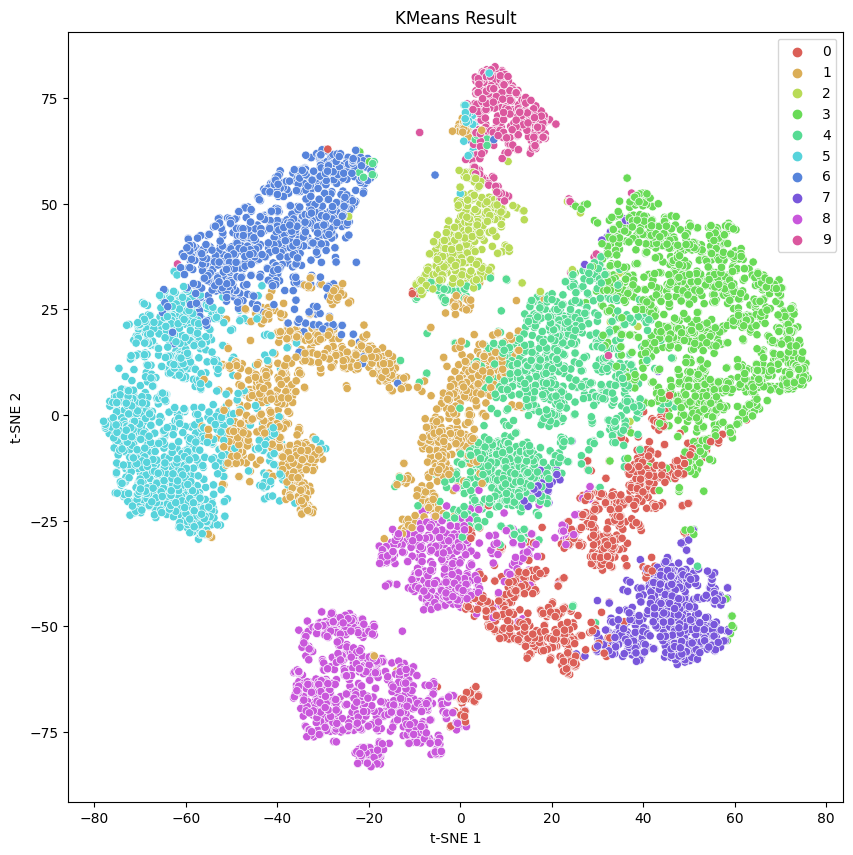

In [185]:
# Plot the kmeans
plt.figure(figsize=(10, 10))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=kmeans.labels_, palette=sns.color_palette("hls", 10))
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('KMeans Result')
plt.show()

# Apply PCA, SVD, Truncated SVD, ICA
**Apply PCA, SVD, Truncated SVD, ICA to reduce the dimensionality of the data, performs KMeans clustering on the reduced data, and then visualizes the clustering results using a scatter plot. This allows for a compressed representation of the data while providing insights into the clusters formed by the KMeans algorithm.**

## Apply PCA and then apply K means
Principal Component Analysis is a statistical process that converts the observations of correlated features into a set of linearly uncorrelated features with the help of orthogonal transformation. These new transformed features are called the Principal Components. It is one of the popular tools that is used for exploratory data analysis and predictive modeling.

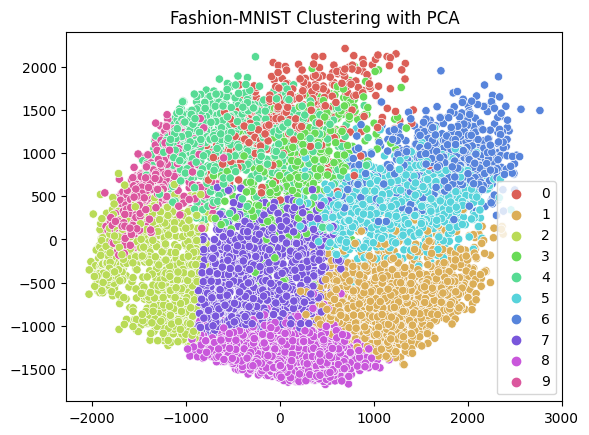

In [177]:
from sklearn.metrics import silhouette_score

# Apply PCA to reduce the dimensionality of the data
pca = PCA(n_components=10)
X_reduced_pca = pca.fit_transform(X)

# Fit the K-means algorithm to the reduced data
kmeans.fit(X_reduced_pca)

# Plot the results
sns.scatterplot(x=X_reduced_pca[:, 0], y=X_reduced_pca[:, 1], hue=kmeans.labels_, palette=sns.color_palette("hls", 10))
plt.title('Fashion-MNIST Clustering with PCA')
plt.show()

## Apply SVD and then apply K means

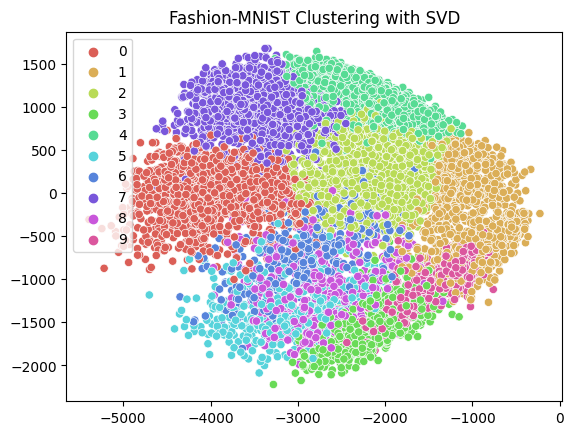

In [178]:
from scipy.linalg import svd
# Perform SVD on the data
U, s, Vt = svd(X, full_matrices=False)

# Reduce the dimensionality using SVD
X_reduced_svd = np.dot(U[:, :10], np.diag(s[:10]))

# Fit the K-means algorithm to the reduced data
kmeans.fit(X_reduced_svd)

# Plot the results
sns.scatterplot(x=X_reduced_svd[:, 0], y=X_reduced_svd[:, 1], hue=kmeans.labels_, palette=sns.color_palette("hls", 10))
plt.title('Fashion-MNIST Clustering with SVD')
plt.show()


## Apply Truncated SVD and then apply K means

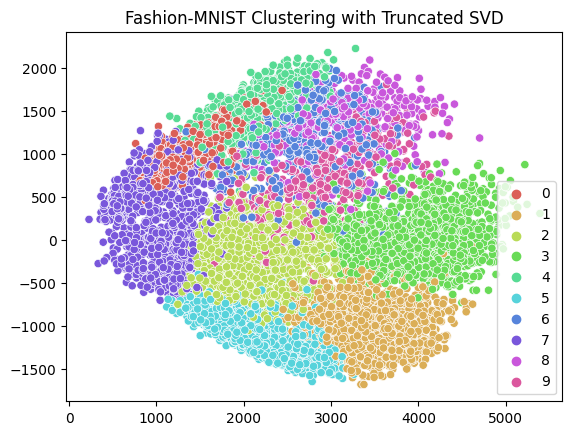

In [179]:
from sklearn.decomposition import TruncatedSVD
# Apply SVD to reduce the dimensionality of the data
svd = TruncatedSVD(n_components=10)
X_reduced_tsvd = svd.fit_transform(X)
kmeans.fit(X_reduced_tsvd)
# Plot the results
sns.scatterplot(x=X_reduced_tsvd[:, 0], y=X_reduced_tsvd[:, 1], hue=kmeans.labels_, palette=sns.color_palette("hls", 10))
plt.title('Fashion-MNIST Clustering with Truncated SVD')
plt.show()

## Apply ICA and then apply K means
Independent Component Analysis (ICA) is a dimensionality reduction technique commonly used in signal processing and data analysis. It is particularly useful when you want to extract underlying independent components from a set of observed mixed signals.

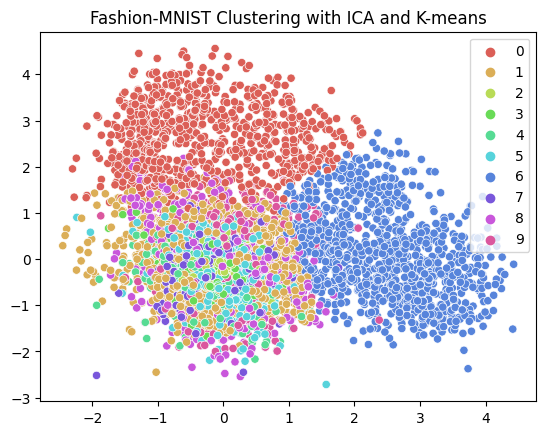

In [181]:
from sklearn.decomposition import FastICA
# Apply ICA 
ica = FastICA(n_components=10, random_state=40, whiten='unit-variance')
X_reduced_ica = ica.fit_transform(X)

kmeans.fit(X_reduced_ica)

# Plot the results
sns.scatterplot(x=X_reduced_ica[:, 0], y=X_reduced_ica[:, 1], hue=kmeans.labels_, palette=sns.color_palette("hls", 10))
plt.title('Fashion-MNIST Clustering with ICA and K-means')
plt.show()